8-Mayo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

import stat
import statsmodels.api as sm
from pandas_profiling import ProfileReport

In [2]:
directorio ="/home/nataly/Documentos/mineria/datos/"
archi = 'LifeExpect.csv'
file=directorio+archi

df = pd.read_csv(file)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
sns.pairplot(df)

In [ ]:
df['Life expectancy '].hist(bins=20);

¿Los diversos factores de predicción elegidos inicialmente afectan realmente a la esperanza de vida? ¿Cuáles son las variables de predicción que realmente afectan la esperanza de vida?


Variables que aportan

 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio                            2919 non-null   float64
 13  Total expenditure                2712 non-null   float64
 14  Diphtheria                       2919 non-null   float64
 15   HIV/AIDS                        
 16  GDP                              
 18   thinness  1-19 years            
 19   thinness 5-9 years              
 20  Income composition of resources  
 21  Schooling     
 
 Variable que no aporta
 
  Population 

In [ ]:
x = df['Life expectancy ']
y = df['Status']
plt.plot(x, y, 'o', color='black');

In [ ]:
sns.heatmap(df.corr(method='spearman'));

In [ ]:
df.corr(method='spearman')

¿Debería un país con un valor de esperanza de vida inferior (<65) aumentar su gasto sanitario para mejorar su esperanza de vida media?

Respuesta

Si

In [ ]:
df_65 = df[(df['Life expectancy '] < 65)]

In [ ]:
sns.scatterplot(data=df_65, x='Life expectancy ', y= 'Total expenditure', hue='Country')

In [ ]:
y = df_65['Life expectancy ']
x = df_65['Country']
plt.figure(figsize=(10,20))
plt.barh(x, y);

In [ ]:
df_65.describe()

In [ ]:
df_ = df[(df['Life expectancy '] >= 65)]
df_.describe()

In [ ]:
y = df_['Life expectancy ']
x = df_['Country']
plt.figure(figsize=(10,20))
plt.barh(x, y);

# ¿Cómo afectan las tasas de mortalidad de niños y adultos a la esperanza de vida?


In [ ]:
# llenando Nan
for col in df.columns:
    try:
        df[col].fillna(df[col].mean(), inplace=True)
    except:
        continue


In [ ]:
sns.scatterplot(data=df, x='Life expectancy ', y= 'Adult Mortality')

Para los adultos la esperanza de vida entre mas aumenta la tasa de mortalidad para ellos disminuye 

In [ ]:
sns.scatterplot(data=df, x='Life expectancy ', y= 'infant deaths')

Para los infantes la esperanza de vida entre mas aumenta la tasa de mortalidad para ellos disminuye, pero tenemos un grupo de indibiduos que al disminuir esa esperanza de vida, su tasa de mortalidad aumenta

# ¿Tiene la esperanza de vida una correlación positiva o negativa con los hábitos alimenticios, el estilo de vida, el ejercicio, el tabaquismo, el consumo de alcohol, etc.?

In [ ]:
df.corrwith(df['Life expectancy '])

correlacion positiva

Year                               0.169623
Life expectancy                    1.000000
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
 BMI                               0.559255
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
GDP                                0.430493
Income composition of resources    0.692483
Schooling                          0.715066

Correlacion Negativa

Adult Mortality                   -0.696359
infant deaths                     -0.196535
Measles                           -0.157574
under-five deaths                 -0.222503
 HIV/AIDS                         -0.556457
Population                        -0.019638
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629

# ¿Cuál es el impacto de la escolarización en la vida útil de los seres humanos?

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

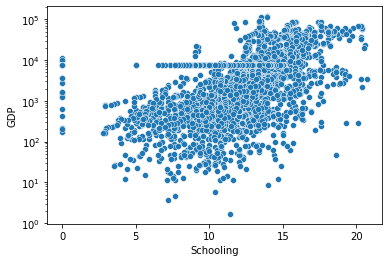

In [73]:
sns.scatterplot(data=df, x='Schooling', y= 'GDP')
plt.yscale('log')

A mayor grado de escolaridad mayor es su producto intero, lo que hace que sea su vida util impacta positivamente la economia del pais

# ¿Tiene la esperanza de vida una relación positiva o negativa con el consumo de alcohol?

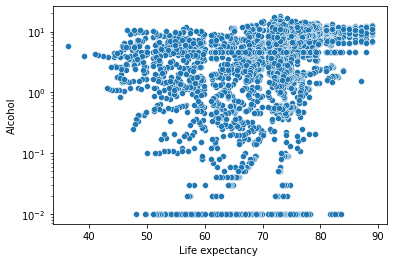

In [76]:
sns.scatterplot(data=df, x='Life expectancy ', y= 'Alcohol')
plt.yscale('log')

Alcohol= 0.391598 CORRELACION POSITIVA

# ¿Los países densamente poblados tienden a tener una menor esperanza de vida?

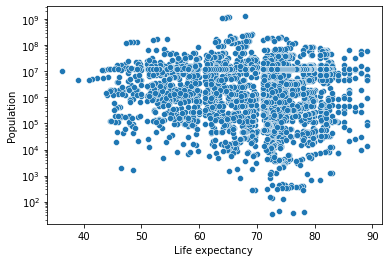

In [82]:
sns.scatterplot(data=df, x='Life expectancy ', y='Population')
plt.yscale('log')

Si, notamos que los países densamente poblados tienden a tener una menor esperanza de vida

# ¿Cuál es el impacto de la cobertura de vacunación en la esperanza de vida?

Text(0.5, 0, 'Life expectancy')

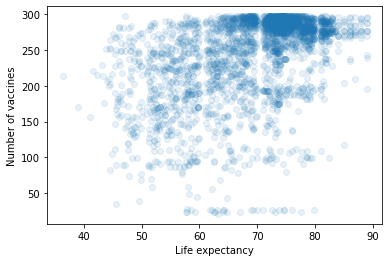

In [97]:
n_vaccines = df['Hepatitis B'] + df['Polio'] + df['Diphtheria ']

plt.scatter(df['Life expectancy '], n_vaccines, alpha=0.1)
plt.ylabel('Number of vaccines')
plt.xlabel('Life expectancy')

a mayor casos de vacunacion mayor es la esperanza de vida

<AxesSubplot:xlabel='Life expectancy ', ylabel='Hepatitis B'>

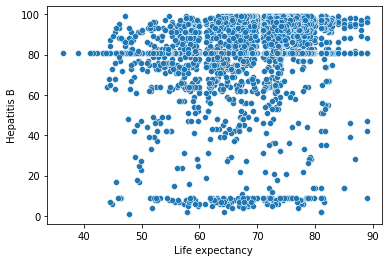

In [87]:
sns.scatterplot(data=df, x='Life expectancy ', y='Hepatitis B')
#plt.yscale('log')

In [84]:
df.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<AxesSubplot:xlabel='Life expectancy ', ylabel='Polio'>

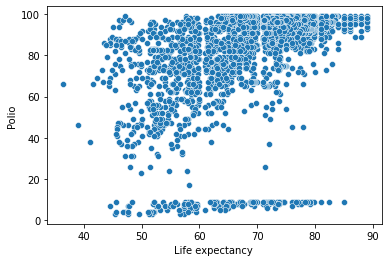

In [88]:
sns.scatterplot(data=df, x='Life expectancy ', y='Polio')
#plt.yscale('log')

<AxesSubplot:xlabel='Life expectancy ', ylabel='Diphtheria '>

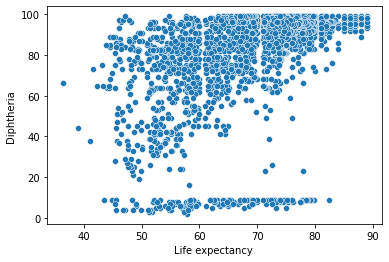

In [89]:
sns.scatterplot(data=df, x='Life expectancy ', y='Diphtheria ')
#plt.yscale('log')